In [2]:
import cv2 # for capturing videos

import math # for mathematical operations

import matplotlib.pyplot as plt # for plotting the images

import pandas as pd

from keras.preprocessing import image # for preprocessing the images

import numpy as np # for mathematical operations

from skimage.transform import resize # for resizing images

from sklearn.model_selection import train_test_split

from glob import glob

from tqdm import tqdm

In [2]:
import os

# Define the directory where the frame images are saved
frame_images_directory = '/content'

# Function to delete all files in a directory
def delete_files_in_directory(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)  # Delete the file
        except Exception as e:
            print(f"Failed to delete {file_path}: {e}")

# Delete all files in the frame images directory
delete_files_in_directory(frame_images_directory)

In [7]:
import shutil

def clear_folder(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")

# Specify the folder path to be cleared
folder_to_clear = '/content/dcsass dataset'

# Call the function to clear the folder
clear_folder(folder_to_clear)

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rawankhaled20/shoplifting-data

 94% 329M/352M [00:03<00:00, 87.7MB/s]
100% 352M/352M [00:03<00:00, 112MB/s] 


In [ ]:
!kaggle datasets download -d rawankhaled20/notshoplifting

 94% 341M/362M [00:03<00:00, 79.3MB/s]
100% 362M/362M [00:03<00:00, 112MB/s] 


In [ ]:
!kaggle datasets download -d mateohervas/dcsass-dataset

 99% 1.34G/1.35G [00:13<00:00, 128MB/s]
100% 1.35G/1.35G [00:14<00:00, 104MB/s]


In [ ]:
!unzip dcsass-dataset.zip

In [ ]:
import os
# Define the name of the folder you want to create
folder_name = 'Shoplifting'

# Define the path where you want to create the folder
folder_path = '/content/' + folder_name

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_name}' created successfully at '{folder_path}'")
else:
    print(f"Folder '{folder_name}' already exists at '{folder_path}'")

Folder 'Shoplifting' created successfully at '/content/Shoplifting'


In [ ]:
import zipfile
import shutil

# Define the path to the zipped file
zip_file_path = '/content/notshoplifting.zip'

# Define the path to the destination folder
destination_folder_path = '/content/NotShoplifting1'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder_path, exist_ok=True)

# Extract the contents of the zipped file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder_path)

# List the extracted files
extracted_files = zip_ref.namelist()

# Move the video files to the destination folder
for file_name in extracted_files:
    if file_name.endswith('.mp4'):  # Check if the file is a video file
        source_file_path = os.path.join(destination_folder_path, file_name)
        destination_file_path = os.path.join(destination_folder_path, file_name.split('/')[-1])  # Extract the file name
        os.rename(source_file_path, destination_file_path)


In [3]:
import os
import pandas as pd

# Define the paths to the folders
shoplift_folder = "/content/Shoplifting1"
noshoplift_folder = "/content/NotShoplifting1"

# Get the list of video files in each folder
shoplift_videos = [os.path.join(shoplift_folder, filename) for filename in os.listdir(shoplift_folder)]
noshoplift_videos = [os.path.join(noshoplift_folder, filename) for filename in os.listdir(noshoplift_folder)]

# Combine the lists of video files
all_videos = shoplift_videos + noshoplift_videos

# Create a DataFrame
train = pd.DataFrame({'video_name': all_videos})

print(train.head())

                                 video_name
0  /content/Shoplifting1/shop_lifter_90.mp4
1   /content/Shoplifting1/shop_lifter_0.mp4
2  /content/Shoplifting1/shop_lifter_78.mp4
3  /content/Shoplifting1/shop_lifter_69.mp4
4  /content/Shoplifting1/shop_lifter_81.mp4


In [4]:
train_video_tag = []

for i in range(train.shape[0]):
    train_video_tag.append(train['video_name'][i].split('/')[0])

train['tag'] = train_video_tag

In [26]:
def store_frames_from_folder(folder_path, destination_folder):
    for filename in os.listdir(folder_path):
        video_file = os.path.join(folder_path, filename)
        cap = cv2.VideoCapture(video_file)
        frame_rate = cap.get(cv2.CAP_PROP_FPS)
        count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            if count % math.floor(frame_rate) == 0:
                frame_filename = f"{filename.split('.')[0]}_frame{count}.jpg"
                destination_path = os.path.join(destination_folder, frame_filename)
                cv2.imwrite(destination_path, frame)
            count += 1
        cap.release()

# Define the path to the train folder where frames will be stored
train_folder = '/content/Train1'

# Create the train folder if it doesn't exist
os.makedirs(train_folder, exist_ok=True)

# Store frames from both shoplift and not shoplift folders into train folder
store_frames_from_folder(shoplift_folder, train_folder)
store_frames_from_folder(noshoplift_folder, train_folder)

In [11]:
# Getting the names of all the images
images = glob("/content/Train1/*.jpg")  # Search for all .jpg files in the current directory

train_image = []
train_class = []

for i in tqdm(range(len(images))):
    # Creating the image name
    train_image.append(images[i])

    # Creating the class of image
    class_label_parts = images[i].split('_')
    class_label = class_label_parts[2]
    if class_label == 'n':
            train_class.append(0)
    else:
            train_class.append(1)

# Storing the images and their class in a DataFrame
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class


# Converting the DataFrame into a CSV file
train_data.to_csv('train_new.csv', header=True, index=False)

100%|██████████| 3766/3766 [00:00<00:00, 689319.17it/s]


In [5]:
import keras

from keras.models import Sequential

from keras.applications.vgg16 import VGG16

from keras.layers import Dense, InputLayer, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

from keras.preprocessing import image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv('train_new.csv')

train.head()

,image,class
0,/content/Train1/shop_lifter_103_frame200.jpg,1
1,/content/Train1/shop_lifter_n_80_frame350.jpg,0
2,/content/Train1/shop_lifter_41_frame144.jpg,1
3,/content/Train1/shop_lifter_63_frame144.jpg,1
4,/content/Train1/shop_lifter_n_79_frame175.jpg,0


In [7]:
# creating an empty list

train_image = []

# for loop to read and store frames

for i in tqdm(range(train.shape[0])):

      # loading the image and keeping the target size as (224,224,3)

    img = image.load_img(train['image'][i], target_size=(224,224,3))

     # converting it to array

    img = image.img_to_array(img)

     # normalizing the pixel value

    img = img/255

    # appending the image to the train_image list

    train_image.append(img)

# converting the list to numpy array

X = np.array(train_image)

# shape of the array

X.shape

100%|██████████| 3766/3766 [00:20<00:00, 186.93it/s]


(3766, 224, 224, 3)

In [8]:
# separating the target

y = train['class']

# creating the training and validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [9]:
base_model = VGG16(weights='imagenet', include_top=False)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    zoom_range=0.1,  # Randomly zoom images by 10%
    fill_mode='nearest'  # Fill any missing pixels after rotation or shifting
)

# Fit the ImageDataGenerator to X_train
datagen.fit(X_train)

# Define the number of augmented samples per original sample
num_augmented_samples = 1

# Generate augmented samples
augmented_data_generator = datagen.flow(X_train, batch_size=num_augmented_samples)

# Generate augmented samples and append them to X_train_augmented
X_train_augmented = []
for _ in tqdm(range(X_train.shape[0])):
    batch = augmented_data_generator.next()
    X_train_augmented.extend(batch)

# Convert the list of augmented samples to a numpy array
X_train_augmented = np.array(X_train_augmented)

100%|██████████| 3012/3012 [00:32<00:00, 91.73it/s] 


In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    zoom_range=0.1,  # Randomly zoom images by 10%
    fill_mode='nearest'  # Fill any missing pixels after rotation or shifting
)

# Fit the ImageDataGenerator to X_train
datagen.fit(X_test)

# Define the number of augmented samples per original sample
num_augmented_samples = 1

# Generate augmented samples
augmented_data_generator = datagen.flow(X_test, batch_size=num_augmented_samples)

# Generate augmented samples and append them to X_train_augmented
X_test_augmented = []
for _ in tqdm(range(X_test.shape[0])):
    batch = augmented_data_generator.next()
    X_test_augmented.extend(batch)

# Convert the list of augmented samples to a numpy array
X_test_augmented = np.array(X_test_augmented)

100%|██████████| 754/754 [00:12<00:00, 62.06it/s]


In [ ]:
# Concatenate augmented samples with original X_train
X_train_augmented = np.concatenate((X_train, X_train_augmented), axis=0)

In [ ]:
# Concatenate augmented samples with original X_test
X_test_augmented = np.concatenate((X_test, X_test_augmented), axis=0)

In [ ]:
# extracting features for training frames

X_train = base_model.predict(X_train)
print(X_train.shape)
# extracting features for validation frames

X_test = base_model.predict(X_test)
print(X_test.shape)

94/94 [==============================] - 25s 179ms/step
(3004, 7, 7, 512)
24/24 [==============================] - 6s 279ms/step
(751, 7, 7, 512)


In [ ]:
# reshaping the training as well as validation frames in single dimension

X_train = X_train.reshape(3004, 7*7*512)
X_test = X_test.reshape(751, 7*7*512)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# shape of images

X_train.shape

(3004, 25088)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape

model = Sequential()

# Initial Dense layer with output shape (4*4*64,)
model.add(Dense(4*4*64, activation='elu', input_shape=(25088,))) # Adjusted output shape

# Dropout for regularization
model.add(Dropout(0.5))

# Reshape for Conv2D input
model.add(Reshape((4, 4, 64)))  # Reshape to match output shape of previous layers

# Convolutional layers for spatial feature extraction
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

# Flatten layer to prepare for LSTM
model.add(Flatten()) # Adjusted to match Reshape layer input shape

# Reshape for LSTM input
model.add(Reshape((4, 128)))  # Reshape to match output shape of previous layers

# LSTM layers for capturing temporal dependencies
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))

# Additional dense layers with dropout
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1024)              25691136  
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 reshape_17 (Reshape)        (None, 4, 4, 64)          0         
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 256)         295168    
                                                     

In [ ]:
# training the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, verbose=1)

Epoch 1/20
94/94 [==============================] - 16s 33ms/step - loss: 0.6940 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5047
Epoch 2/20
94/94 [==============================] - 2s 17ms/step - loss: 0.4831 - accuracy: 0.7217 - val_loss: 0.0934 - val_accuracy: 0.9534
Epoch 3/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0810 - accuracy: 0.9690 - val_loss: 0.0069 - val_accuracy: 0.9987
Epoch 4/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 0.0180 - val_accuracy: 0.9933
Epoch 5/20
94/94 [==============================] - 2s 17ms/step - loss: 0.0635 - accuracy: 0.9774 - val_loss: 3.4057e-04 - val_accuracy: 1.0000
Epoch 6/20
94/94 [==============================] - 2s 22ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 3.3919e-05 - val_accuracy: 1.0000
Epoch 7/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0100 - accuracy: 0.9953 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoc

24/24 [==============================] - 1s 4ms/step


Text(0.5, 25.722222222222214, 'Actual')

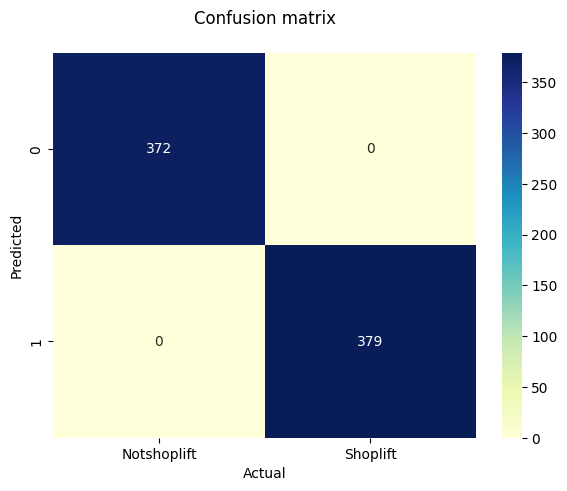

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = model.predict(X_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=[0, 1], columns=['Notshoplift', 'Shoplift'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [ ]:
model.save('mod11.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

def submit(folder_path):
    model_prediction=[]
    model=load_model('mod11.h5')
    for filename in os.listdir(folder_path):
        video_file = os.path.join(folder_path, filename)
        cap = cv2.VideoCapture(video_file)
        frame_rate = cap.get(cv2.CAP_PROP_FPS)

        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)

        # Extract features using pre-trained model
        prediction_images = []
        for img in frames:
            img = cv2.resize(img, (224, 224))
            img = image.img_to_array(img)
            img = img / 255
            prediction_images.append(img)

        # Convert all the frames for a test video into numpy array
        prediction_images = np.array(prediction_images)

        # Extract features using pre-trained model
        prediction_images = base_model.predict(prediction_images)

        # Convert features into one-dimensional array
        prediction_images = prediction_images.reshape(prediction_images.shape[0], 7 * 7 * 512)

        # Predict tags for each array
        predictions = model.predict(prediction_images)

        # Append the mode of predictions in predict list to assign the tag to the video
        # Assuming 0 corresponds to "not shoplift" and 1 corresponds to "shoplift"
        # Use majority voting to determine the predicted class label
        predicted_class = "1" if np.mean(predictions) > 0.5 else "0"
        model_prediction.append(predicted_class)

    return model_prediction

folder='my_folder'
predictions = submit(folder)
print(predictions)

9/9 [==============================] - 0s 33ms/step
['0', '1', '1']


In [ ]:
import shutil

# Define the name of the file and the name of the folder
file_name = "DCSASS Dataset/Shoplifting/Shoplifting001_x264.mp4/Shoplifting001_x264_14.mp4"
folder_name = "Shoplifting1"

# Specify the source path of the file
source_path = "/content/" + file_name

# Specify the destination path of the folder
destination_path = "/content/" + folder_name + "/" + file_name

# Copy the file to the specified folder
shutil.move(source_path, destination_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Shoplifting1/DCSASS Dataset/Shoplifting/Shoplifting001_x264.mp4/Shoplifting001_x264_14.mp4'